## 整理Google Trends 感冒搜尋趨勢數據

In [3]:
import pandas
df  = pandas.read_csv('https://raw.githubusercontent.com/ywchiu/cdc_course/master/data/multiTimeline.csv', skiprows=[0,1])

In [5]:
df.columns = ['週', '感冒']
df.head()

,週,感冒
0,2014-07-06,28
1,2014-07-13,34
2,2014-07-20,27
3,2014-07-27,29
4,2014-08-03,21


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
週     261 non-null object
感冒    261 non-null int64
dtypes: int64(1), object(1)
memory usage: 4.2+ KB


In [8]:
df['週'] = pandas.to_datetime(df['週'], format= '%Y-%m-%d')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Data columns (total 2 columns):
週     261 non-null datetime64[ns]
感冒    261 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 4.2 KB


Populating the interactive namespace from numpy and matplotlib


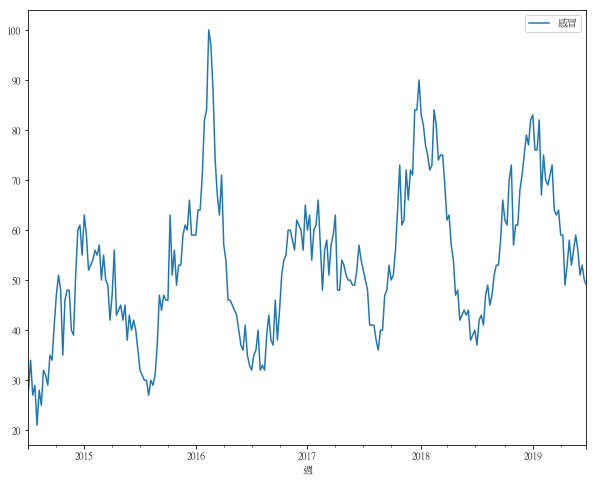

In [13]:
%pylab inline

import matplotlib
matplotlib.rcParams['font.family'] = 'PMingLiU'
mpl.rcParams['font.sans-serif'] = ['PMingLiU']

df.plot(x = '週', y ='感冒', kind = 'line', figsize = [10,8])

In [32]:
df.head()

,週,感冒
0,2014-07-06,28
1,2014-07-13,34
2,2014-07-20,27
3,2014-07-27,29
4,2014-08-03,21


## 整理CDC 流感併發重症數據

In [14]:
import pandas
flu = pandas.read_csv('https://od.cdc.gov.tw/eic/Age_County_Gender_487a.csv')

In [18]:
stat = flu.groupby(['發病年份', '發病月份'])['確定病例數'].sum().to_frame()

In [21]:
stat.reset_index(level=0, inplace=True)

In [23]:
stat.reset_index(inplace=True)

In [26]:
stat['發病日期'] = stat['發病年份'].astype(str) + '-' + stat['發病月份'].astype(str) + '-01'

In [28]:
stat['發病日期'] = pandas.to_datetime(stat['發病日期'], format = '%Y-%m-%d')

In [29]:
stat.head()

,發病月份,發病年份,確定病例數,發病日期
0,1,2003,6,2003-01-01
1,2,2003,3,2003-02-01
2,3,2003,1,2003-03-01
3,11,2003,2,2003-11-01
4,12,2003,4,2003-12-01


In [33]:
flu_stat = stat[stat['發病日期'] > '2014-07-01']

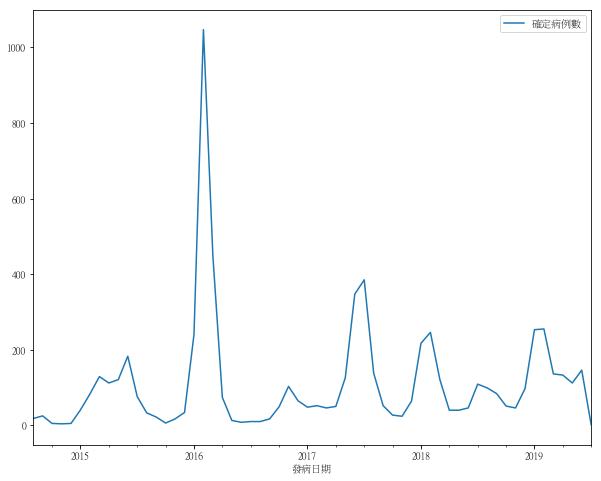

In [34]:
flu_stat.plot(x = '發病日期', y = '確定病例數',kind = 'line', figsize = [10,8])

In [41]:
df['發病日期'] = df['週'].dt.year.astype(str) + '-' + df['週'].dt.month.astype(str) + '-' + '01'

In [44]:
df = df.groupby('發病日期')['感冒'].sum().to_frame()
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-7-01,118
2014-8-01,137


In [46]:
df.index = pandas.to_datetime(df.index, format= '%Y-%m-%d')

In [47]:
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-07-01,118
2014-08-01,137


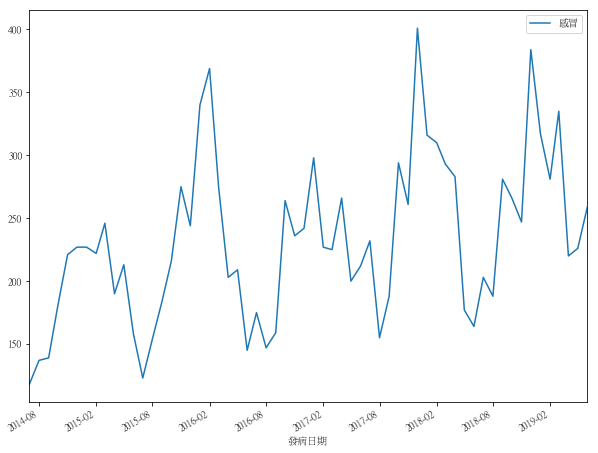

In [49]:
df.plot(kind = 'line', figsize = [10,8])

In [52]:
flu_stat = flu_stat[['發病日期', '確定病例數']] 
flu_stat.set_index('發病日期' , inplace=True)
flu_stat.head()

,確定病例數
發病日期,
2014-08-01,18
2014-09-01,25
2014-10-01,5
2014-11-01,4
2014-12-01,5


In [54]:
df.head()

,感冒
發病日期,
2014-10-01,181
2014-11-01,221
2014-12-01,227
2014-07-01,118
2014-08-01,137


## 交叉分析兩者資料

In [55]:
m = pandas.merge(flu_stat, df, left_index=True, right_index=True)

In [56]:
m.head()

,確定病例數,感冒
發病日期,,
2014-08-01,18,137
2014-09-01,25,139
2014-10-01,5,181
2014-11-01,4,221
2014-12-01,5,227


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1219199b0>,
      dtype=object)

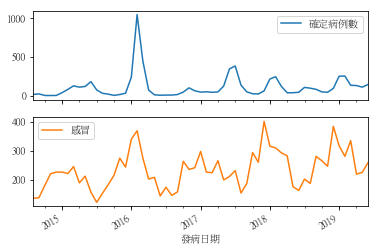

In [57]:
m.plot(subplots=True)

In [58]:
m.corr()

,確定病例數,感冒
確定病例數,1.000000,0.402567
感冒,0.402567,1.000000


In [61]:
m['ma3'] = m['感冒'].rolling(window = 3).mean()

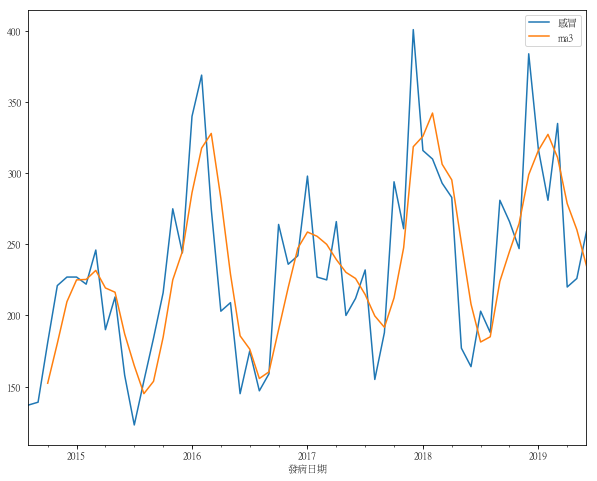

In [62]:
m[['感冒','ma3']].plot(kind = 'line', figsize = [10,8])